In [1]:
!git clone https://github.com/MattChanTK/gym-maze.git

fatal: destination path 'gym-maze' already exists and is not an empty directory.


In [2]:
%cd gym-maze/
!python setup.py install

/content/gym-maze
running install
running bdist_egg
running egg_info
writing gym_maze.egg-info/PKG-INFO
writing dependency_links to gym_maze.egg-info/dependency_links.txt
writing requirements to gym_maze.egg-info/requires.txt
writing top-level names to gym_maze.egg-info/top_level.txt
writing manifest file 'gym_maze.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/gym_maze
copying build/lib/gym_maze/__init__.py -> build/bdist.linux-x86_64/egg/gym_maze
creating build/bdist.linux-x86_64/egg/gym_maze/envs
copying build/lib/gym_maze/envs/__init__.py -> build/bdist.linux-x86_64/egg/gym_maze/envs
copying build/lib/gym_maze/envs/maze_env.py -> build/bdist.linux-x86_64/egg/gym_maze/envs
copying build/lib/gym_maze/envs/maze_view_2d.py -> build/bdist.linux-x86_64/egg/gym_maze/envs
creating build/bdist.linux-x86_64/egg/gym_maze/envs/maze_samples
copying buil

In [3]:
!pip install pygame
import pygame

pygame 2.0.0.dev6 (SDL 2.0.10, python 3.6.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [0]:
import numpy as np
import gym
import gym_maze
import random
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [5]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
pygame.display.set_mode((640,480))

<Surface(640x480x32 SW)>

In [0]:
env = gym.make("maze-random-100x100-v0")
action_num = env.action_space.n
MAZE_SIZE = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
obs_num = MAZE_SIZE[0] * MAZE_SIZE[1]

In [0]:
# Learning Parameters
episodes_num = 200
learning_rate = 0.3
max_steps = 1000000
discount = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_max = 1.0
decay_rate = 0.005

In [0]:
q_table = np.zeros((obs_num, action_num))

In [0]:
def greedy(eps):
  pivot = random.uniform(0, 1)
  return pivot > eps

In [0]:
def obs_to_state(obs):
  return int(obs[0] * MAZE_SIZE[1] + obs[1])

In [0]:
act = ['N', 'E', 'S', 'W']

In [125]:
%%time

rewards = []

for episode in range(episodes_num):
  state = obs_to_state(env.reset())
  reward = 0
  done = False
  cumul_rewards = 0

  for step in range(max_steps):
    #env.render()

    # Choose an action
    if greedy(epsilon):
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()
    
    # Perform it
    obs, reward, done, _ = env.step(act[action])
    new_state = obs_to_state(obs)

    # Update q-table
    q_table[state, action] = q_table[state, action] + learning_rate * (reward + 
                  discount * np.max(q_table[new_state, :]) - q_table[state, action])
    state = new_state

    cumul_rewards += reward
    # print(reward)

    if done == True:
      # print(step)
      break

  #env.render()
  rewards.append(cumul_rewards)
#  if episode > 500:
#    if np.var(rewards[-500:-1]) < 15.0:
#      break
  epsilon = epsilon_min + (epsilon_max - epsilon_min)*np.exp(-decay_rate * episode) 

env.close()
print(f'Average reward:{sum(rewards)/episodes_num}')

Average reward:-0.8181375499763085
CPU times: user 35min 42s, sys: 7.1 s, total: 35min 49s
Wall time: 35min 40s


In [81]:
print(rewards)

[-1.1109999999998785, -0.09199999999999053, -1.6919999999998145, 0.4449999999999996, 0.6719999999999997, 0.7249999999999999, -0.6649999999999274, 0.06599999999999928, 0.37699999999999956, 0.2869999999999995]


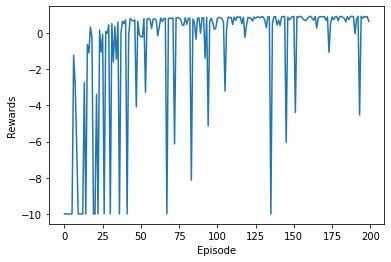

In [126]:
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.show()

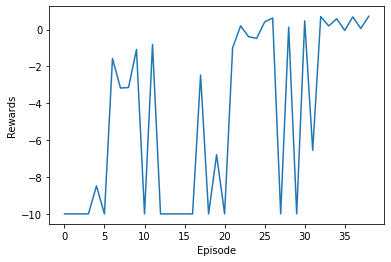

In [117]:
plt.plot(rewards[1:40])
plt.xlabel('Episode') 
plt.ylabel('Rewards')
plt.show()

In [15]:
print(q_table)

[[-1.99944028e-05 -1.99972007e-05 -1.99935053e-05 -1.99944033e-05]
 [-1.99933914e-05 -1.99924543e-05 -1.99942706e-05 -1.99946599e-05]
 [-1.99729111e-05 -1.99864559e-05 -1.99709366e-05 -1.99842416e-05]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [128]:
rewards_test = []
steps = []

for episode in range(1):
    state = obs_to_state(env.reset())
    total_reward = 0
    step = 0
    done = False

    for step in range(max_steps):
        
        action = np.argmax(q_table[state,:])
        
        obs, reward, done, info = env.step(act[action])
        new_state = obs_to_state(obs)

        total_reward += reward
        # print(reward)
        
        if done:
          break
        state = new_state
    rewards_test.append(total_reward)

env.close()

print(f'Average reward: {np.mean(rewards_test)}')
print(np.var(rewards_test))

Average reward: -9.99999999979059
0.0


In [0]:
from numpy import linalg as LA

In [0]:
q_table_tmp = q_table

In [0]:
X = np.array(q_table_tmp)
Y = np.array(q_table)
N = LA.norm(X, 'fro')
LA.norm(X - Y, 'fro') / N

0.7543030559321763

In [0]:
df2 = pd.DataFrame()
df2['rewards'] = rewards
df2.to_csv('Q_tab_Taxi_30000_rewards.csv')
files.download(r'Q_tab_Taxi_30000_rewards.csv')